In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [15]:
data = pd.read_csv("data.csv")
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68617,52,2,168,76.0,120,80,1,1,1,0,1,0
68618,61,1,158,126.0,140,90,2,2,0,0,1,1
68619,52,2,183,105.0,180,90,3,1,0,1,0,1
68620,61,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='BMI'>

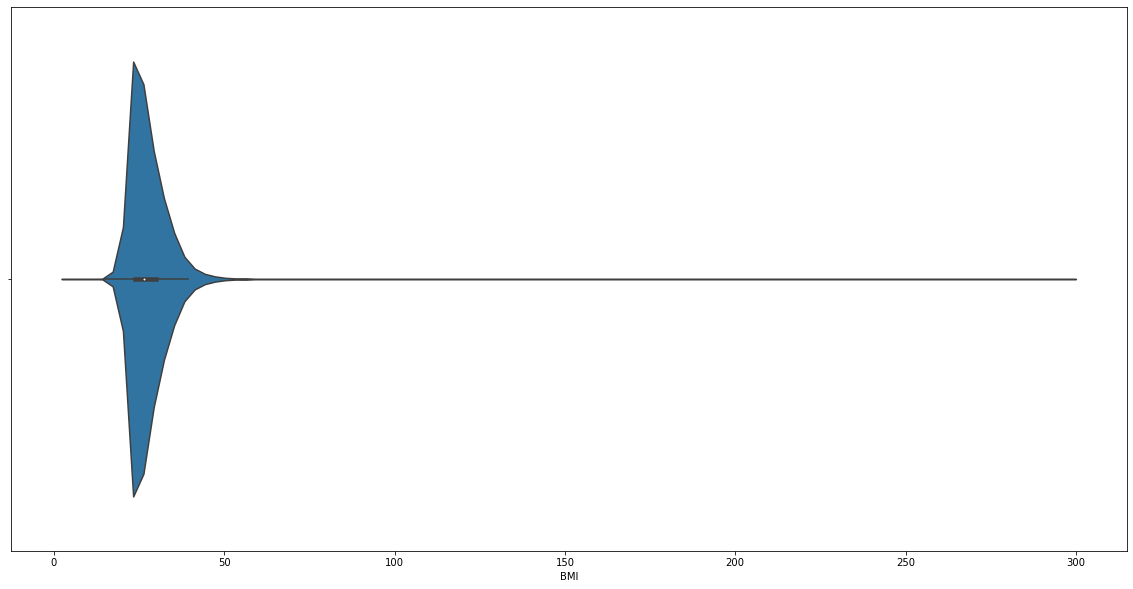

In [16]:
# Based on medical knowledge, BMI is an important metric
height = data["height"]
weight = data["weight"]

# BMI = Weght in Kg / (Height in meter) ^ 2

data["BMI"] = round(weight/ (height/100)**2,1)
bmi = data["BMI"]
# Look at the distribution of the BMI
fig = plt.figure(figsize = (20,10))
sb.violinplot(x = data["BMI"])

In [17]:
# Using BMI, we can construct 1 more categorical variable call Obesity
# 0 - Underweight ( BMI < 18.5)
# 1 - Healthy ( 18.5 <= BMI < 25)
# 2 - Overweight (25 <= BMI < 30)
# 3 = Obese ( BMI > 30 )

data["Obesity"] = 0 # Set everyone to 0
data.loc[bmi >= 18.5, "Obesity"] = 1 # Use condition to compare
data.loc[bmi >= 25, "Obesity"] = 2
data.loc[bmi >= 30, "Obesity"] = 3
data["Obesity"] = data["Obesity"].astype("category")
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity
0,50,2,168,62.0,110,80,1,1,0,0,1,0,22.0,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.9,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.5,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.7,2
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68617,52,2,168,76.0,120,80,1,1,1,0,1,0,26.9,2
68618,61,1,158,126.0,140,90,2,2,0,0,1,1,50.5,3
68619,52,2,183,105.0,180,90,3,1,0,1,0,1,31.4,3
68620,61,1,163,72.0,135,80,1,2,0,0,0,1,27.1,2


<AxesSubplot:xlabel='Obesity', ylabel='cardio'>

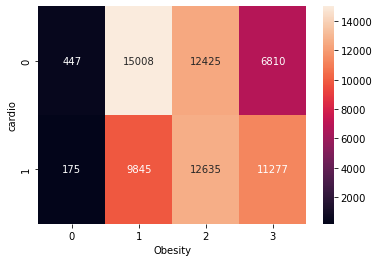

In [18]:
display(sb.heatmap(data.groupby(["cardio","Obesity"]).size().unstack(), annot = True, fmt = "0.0f"))

In [19]:
# Base on the obesity rating we can see that 
# - For underweight and healthy people, the majority don't have disease
# - For overweight people, the number of people having and not having disease is comparable
# - For obese people, the majority has disease.
# This category can be useful 

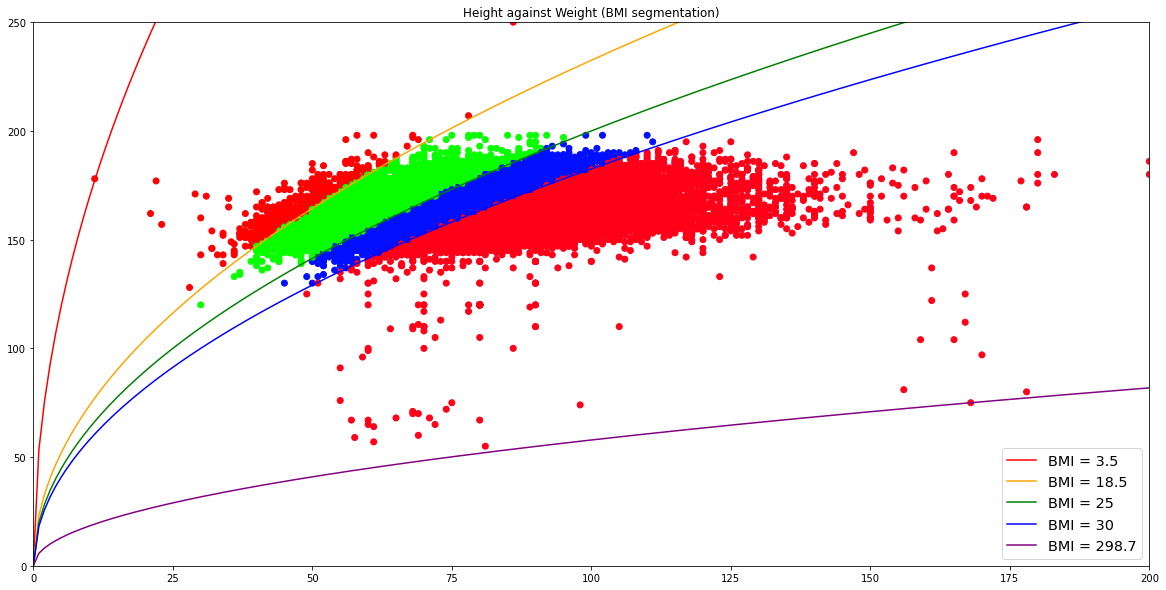

In [20]:
# Plot the BMI graph to visualize
fig = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Obesity", data = data, cmap= "hsv", label = "")
x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/bmi.min())*100, c = "red", label = "BMI = "+str(round(bmi.min(),1)))
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c = "orange", label = "BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c = "green", label = "BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c = "blue", label = "BMI = 30")

plt.plot(x_val,np.sqrt(x_val/bmi.max())*100, c = "purple", label = "BMI = "+str(round(bmi.max(),1)))

plt.xlim([0, data["weight"].max()])
plt.ylim([0,data["height"].max()])
plt.title("Height against Weight (BMI segmentation)")
plt.legend(fontsize = "x-large")
plt.show()

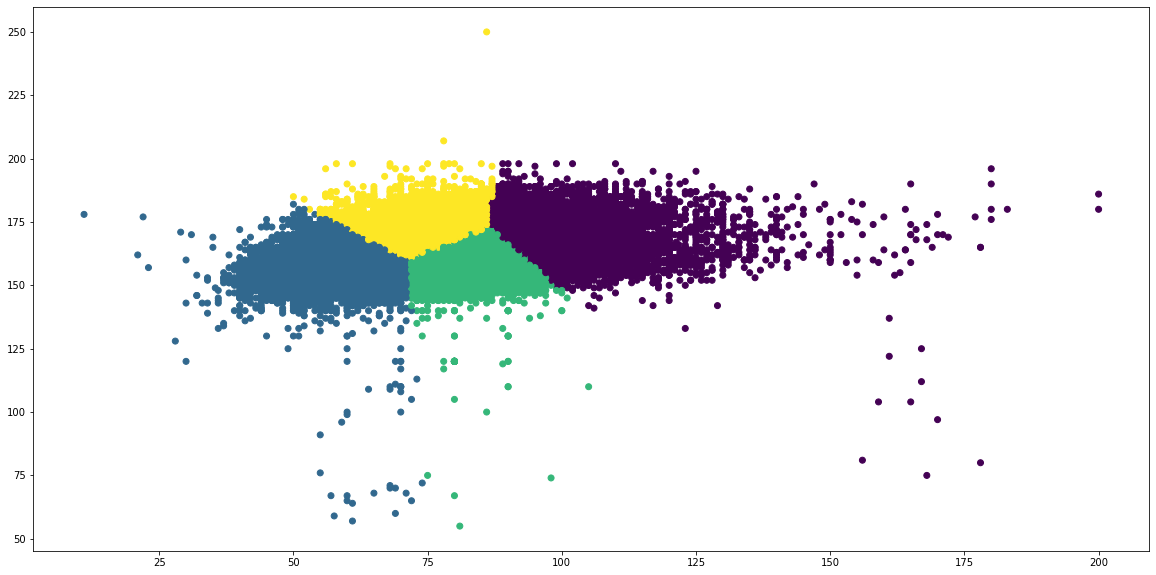

In [21]:
# Try various form of clustering
# From the website https://scikit-learn.org/stable/modules/clustering.html
# Try K means, Gaussian

# Kmeans : using distance between points
WH = data[["height","weight"]]

from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
kmean.fit(WH)

labels = kmean.predict(WH)
WH_cluster = WH.copy()
WH_cluster["Cluster"] = pd.Categorical(labels)

fig1 = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Cluster", data = WH_cluster)

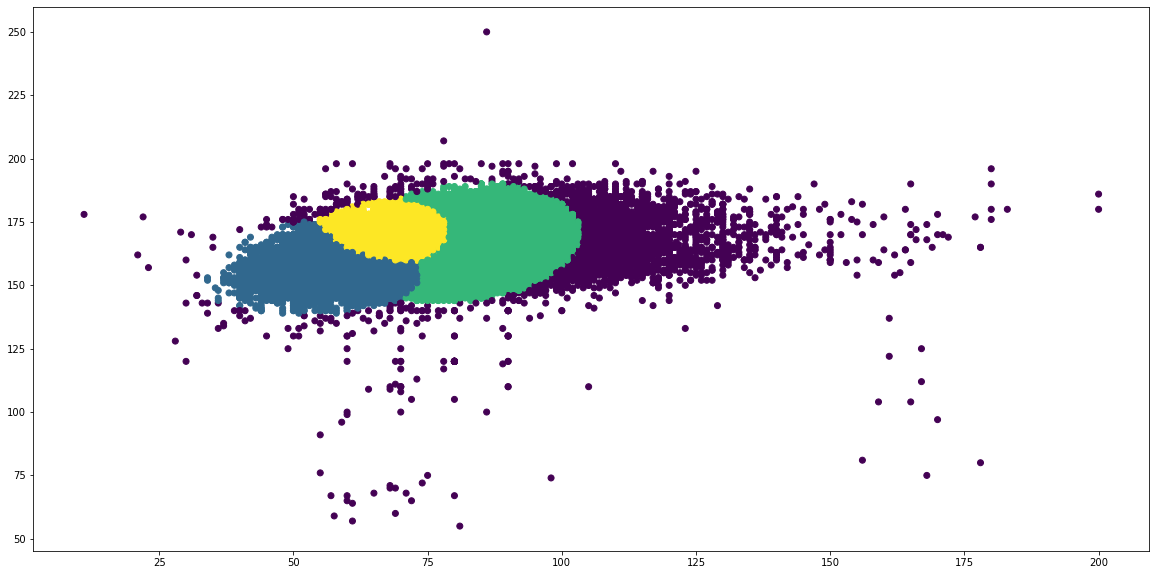

In [22]:
## Gaussian Clustering assume that the data are generated from a finite number of Gaussian distribution 

from sklearn.mixture import GaussianMixture

gauss = GaussianMixture(n_components = 4)
gauss.fit(WH)

labels = gauss.predict(WH)
WH_cluster = WH.copy()
WH_cluster["Cluster"] = pd.Categorical(labels)

fig1 = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Cluster", data = WH_cluster)

In [23]:
## These clustering methods assume a "centroid" center point (Gaussian has a mean of distribution)
# Other type of clustering was tried but it led to crashing due to the large number of data-points and the need to calculate distance pairwise between data point

# As seen in the BMI graph and due to BMI calculation, BMI clusters are segmented using the a quadratic formula Weight = A*(Height)**2

# It was derived in the 19th century. Like machine learning, people try to learn and pick out the pattern from various data. 
# The model the originator of BMI used was a simple quadratic formula. However, in the past, they lack the tools for big data collection and analysis. Hence many even questioned the effectiveness of BMI
# However, it stills serve as a good rules of thumb

In [24]:
data.to_csv("databmi.csv", index = False)